In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading Data From CSV File
df = pd.read_csv("titan_train.csv")

In [4]:
df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S


In [5]:
# Creating another copy
train_original = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.shape

(891, 12)

In [8]:
#Stats for Numeric Data
df.describe()[['Age','SibSp','Parch','Fare']]

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Ploting Graphs for Features

## Survived

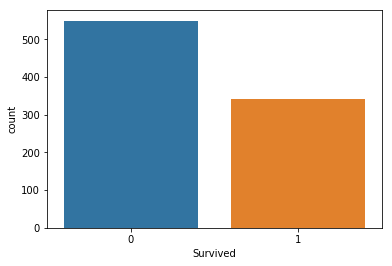

In [9]:
sns.countplot(data=df,x='Survived')

In [10]:
df[df['Survived']==0].count()['PassengerId']

549

In [11]:
df[df['Survived']==1].count()['PassengerId']

342

##### Survived With Gender

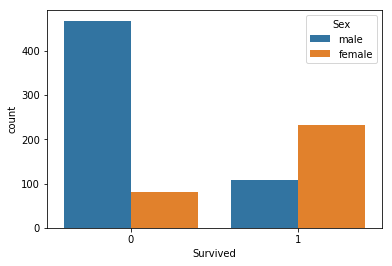

In [12]:
sns.countplot(data=df,x='Survived',hue='Sex')

##### Survived in Numbers (Gender)

In [13]:
df.pivot_table(index='Survived',columns='Sex',values='PassengerId',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


##### Survived with Male

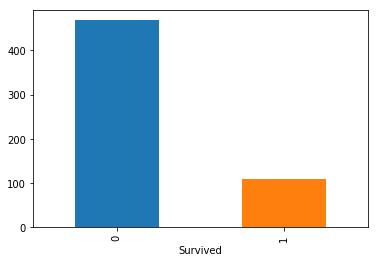

In [14]:
df.pivot_table(index='Survived',columns='Sex',values='PassengerId',aggfunc='count')['male'].plot('bar')

##### Survived with Female

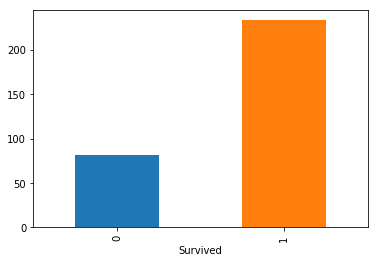

In [15]:
df.pivot_table(index='Survived',columns='Sex',values='PassengerId',aggfunc='count')['female'].plot('bar')

## Sex

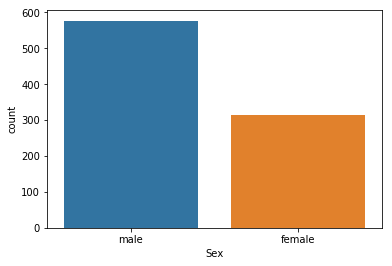

In [16]:
sns.countplot(data=df,x='Sex')

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## SibSp

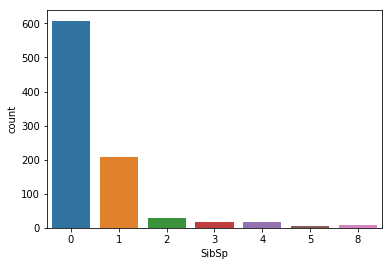

In [18]:
sns.countplot(data=df,x='SibSp')

## Parch

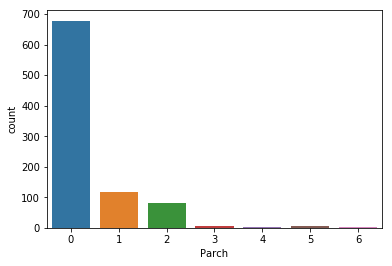

In [19]:
sns.countplot(data=df,x='Parch')

## SibSp & Parch

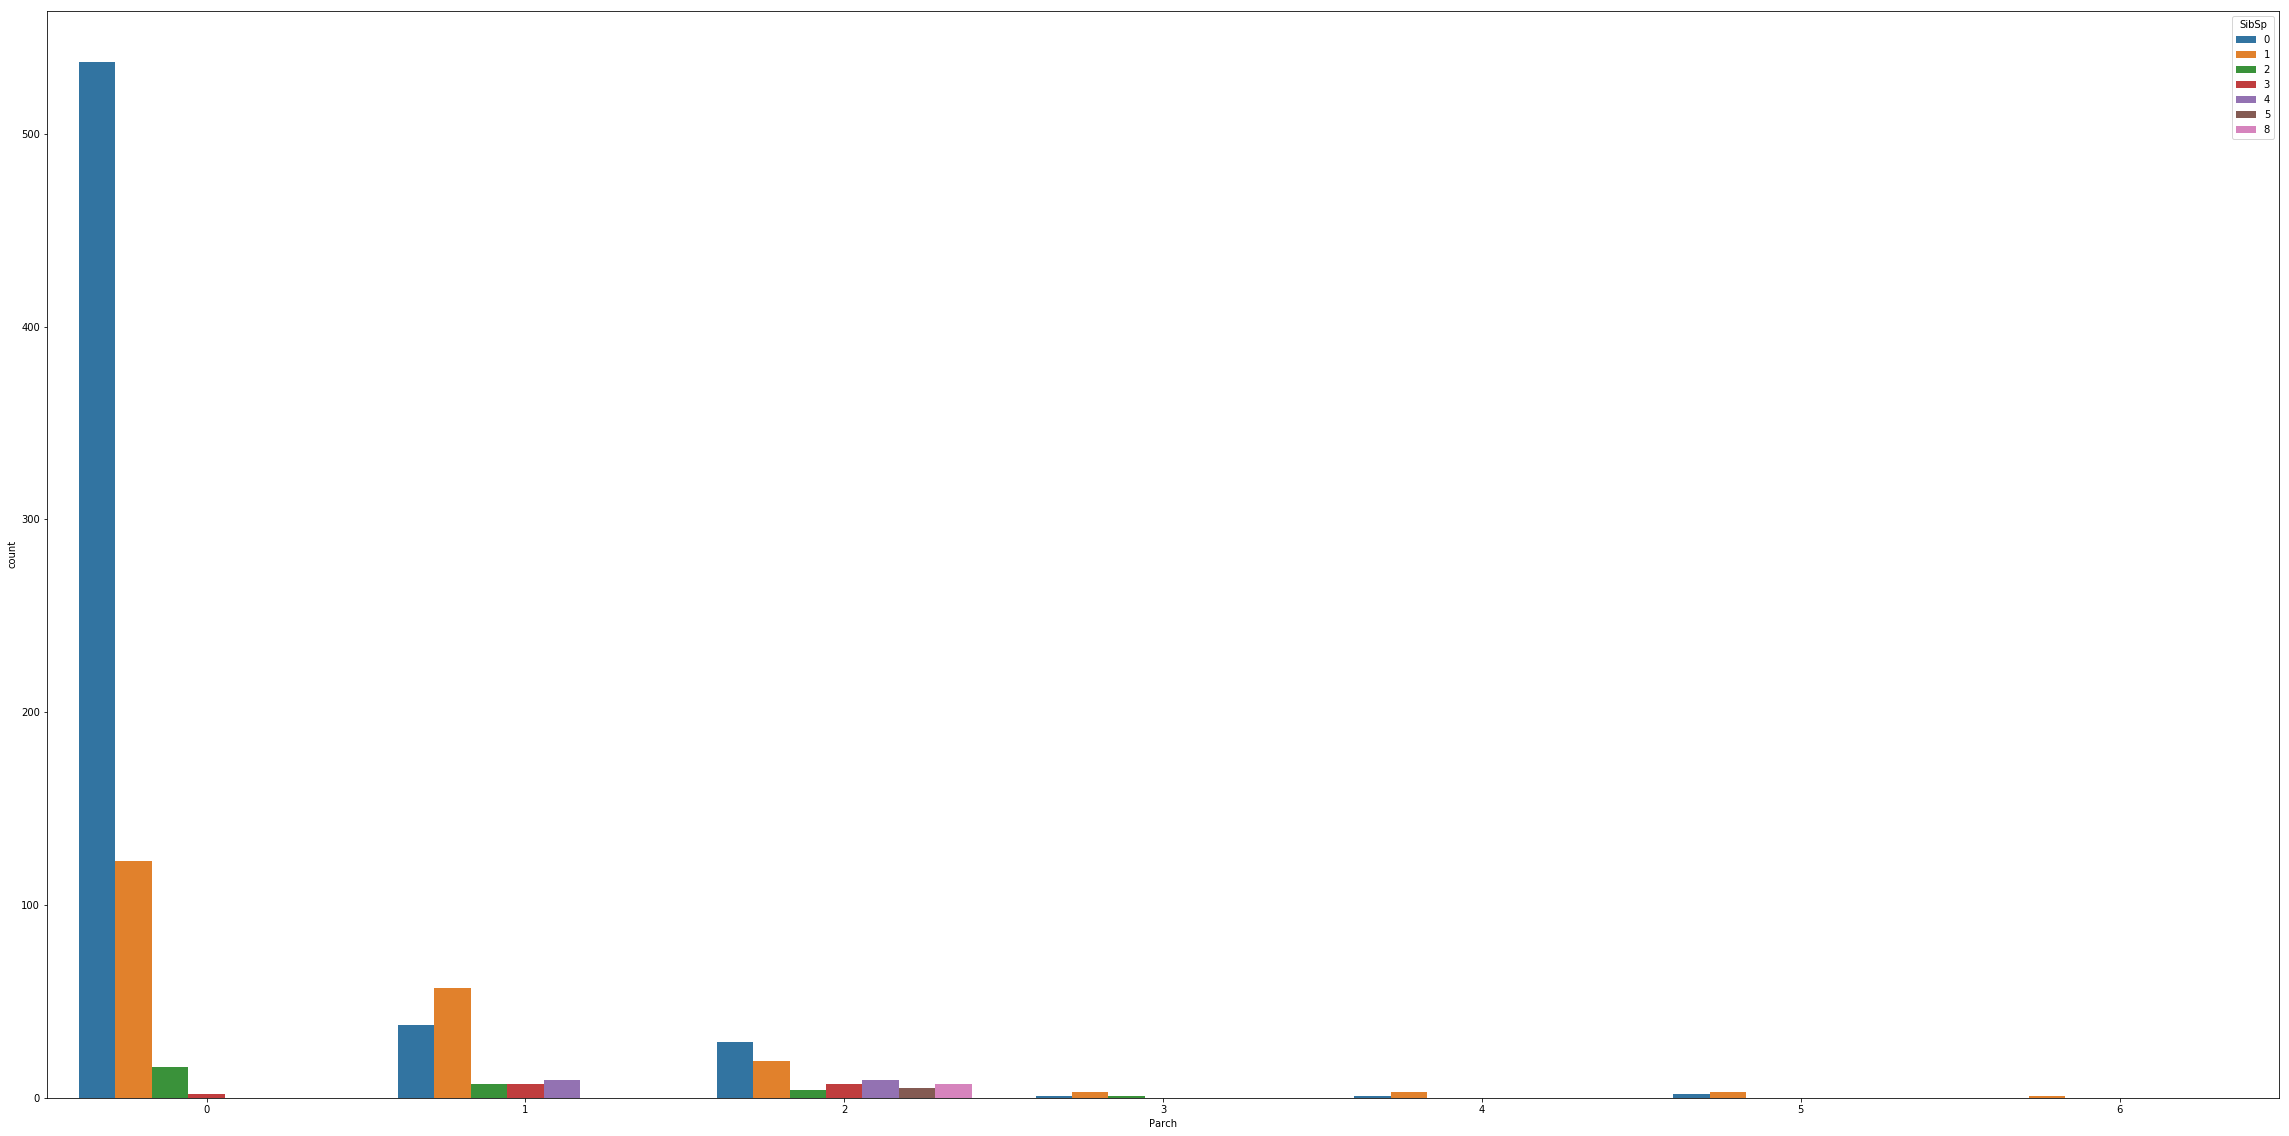

In [20]:
f, ax = plt.subplots(figsize=(40, 20))
sns.countplot(data=df,x='Parch',hue='SibSp')

In [21]:
df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


## Ticket

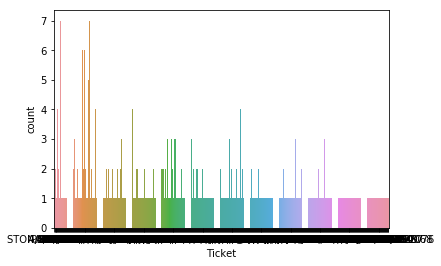

In [22]:
sns.countplot(data=df,x='Ticket')

## Fare

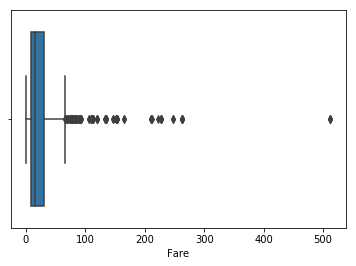

In [23]:
sns.boxplot(data=df,x='Fare')

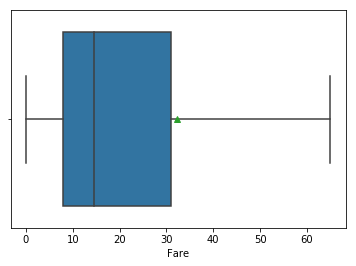

In [24]:
sns.boxplot(data=df,x='Fare',showfliers=False,showmeans=True)

## Embarked

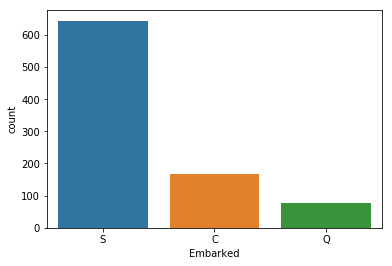

In [25]:
sns.countplot(data=df,x='Embarked')

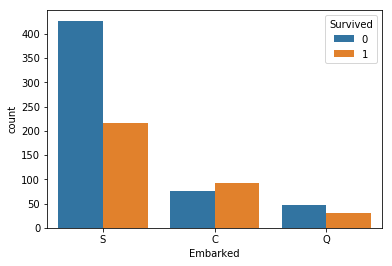

In [26]:
sns.countplot(data=df,x='Embarked',hue='Survived')

## AGE

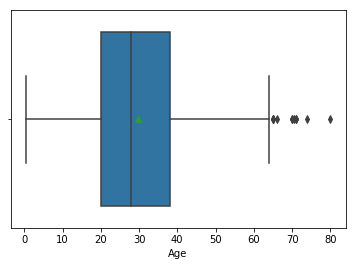

In [27]:
sns.boxplot(data = df,x='Age',showfliers=True,showmeans=True)

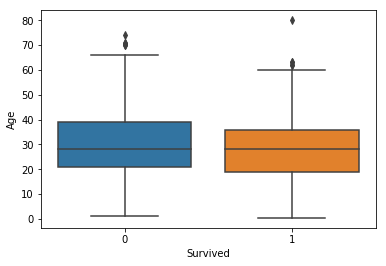

In [28]:
sns.boxplot(data = df,y='Age',x='Survived')

In [29]:
df['Age'].mode()

0    24.0
dtype: float64

In [30]:
df['Age'].mean()

29.69911764705882

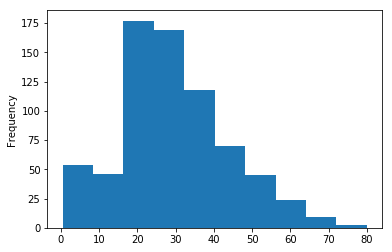

In [31]:
df['Age'].plot('hist')

##### Age With Survived

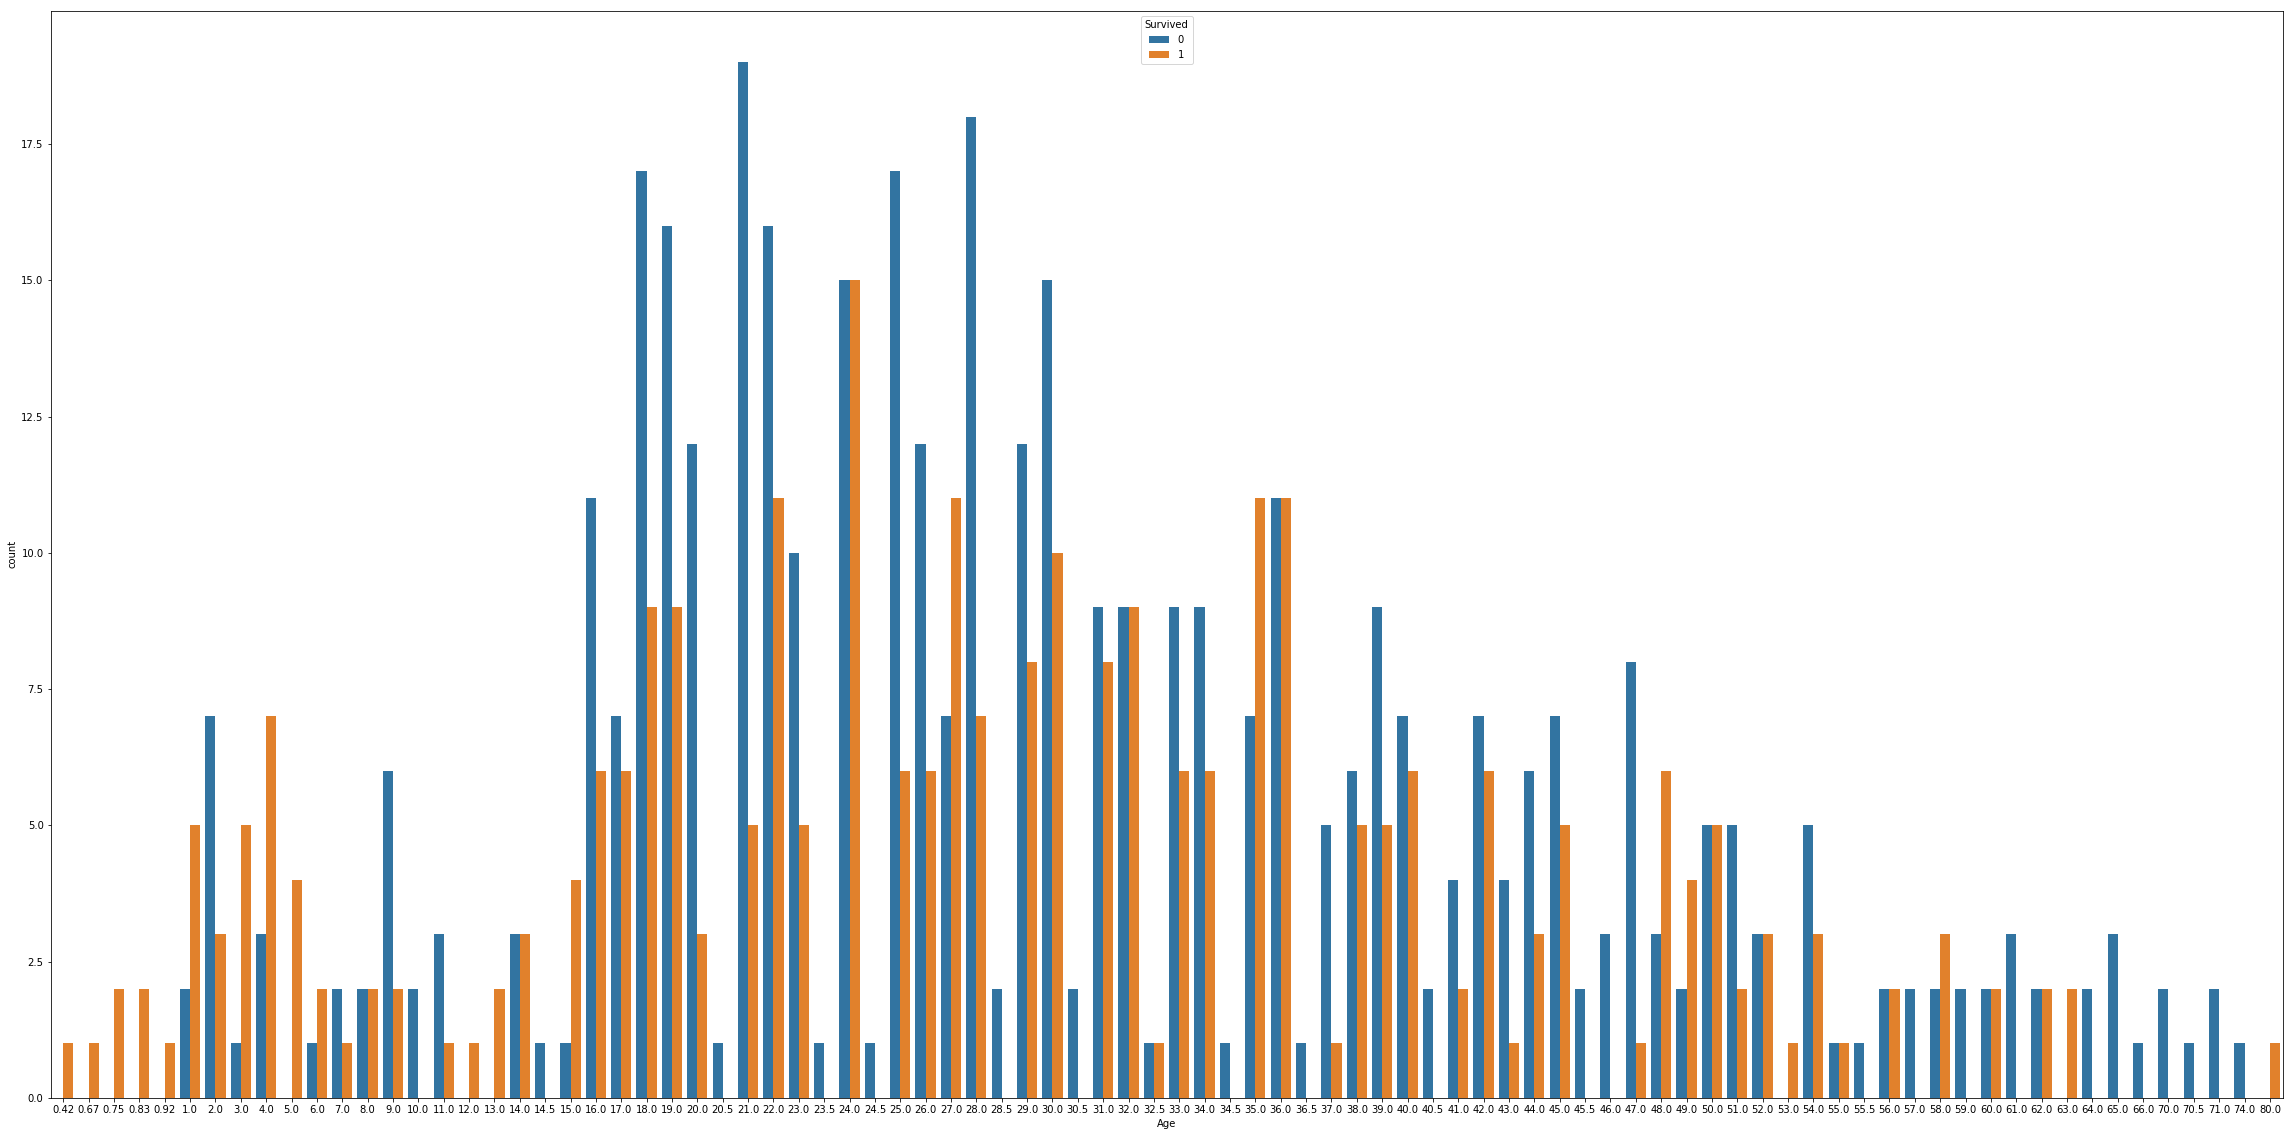

In [32]:
f, ax = plt.subplots(figsize=(40, 20))
sns.countplot(data=df,x='Age',hue='Survived')

##### Binning

In [33]:
# Using CUT and QCUT
bins = [0,10,20,40,60,80]
group=['kids','teen','adults','middleage','oldage']
group1=['Young','Adult','Old']
df['Age_Bins']=pd.cut(x=df['Age'],bins=bins,labels=group)
df['Age_Bins1']=pd.qcut(df["Age"],3,labels=group1)

In [34]:
df['Age_Bins'].value_counts()

adults       385
middleage    128
teen         115
kids          64
oldage        22
Name: Age_Bins, dtype: int64

In [35]:
df['Age_Bins'].isna().any()

True

In [36]:
df['Age_Bins1'].value_counts()

Young    246
Old      236
Adult    232
Name: Age_Bins1, dtype: int64

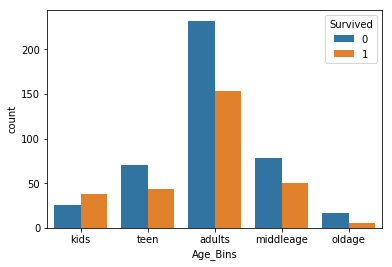

In [37]:
# Using 5 bins (Graph) 
sns.countplot(data = df, x= 'Age_Bins',hue='Survived')

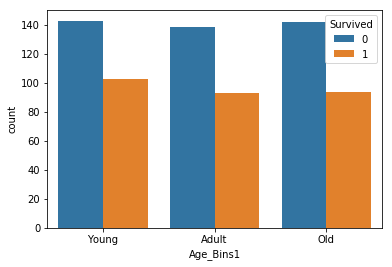

In [38]:
# Using 3 Bins (Graph)
sns.countplot(data = df, x= 'Age_Bins1',hue='Survived')

In [39]:
# In Terms of numbers
df.pivot_table(index='Survived',columns='Age_Bins',values='PassengerId',aggfunc='count')

Age_Bins,kids,teen,adults,middleage,oldage
Survived,,,,,
0,26,71,232,78,17
1,38,44,153,50,5


In [40]:
# using GroupBy Frame
d = df.groupby(by=["Survived","Age_Bins"], as_index=False)['PassengerId'].count()
d.rename(columns={'PassengerId':'Count'}, inplace=True)
print(d)

   Survived   Age_Bins  Count
0         0       kids     26
1         0       teen     71
2         0     adults    232
3         0  middleage     78
4         0     oldage     17
5         1       kids     38
6         1       teen     44
7         1     adults    153
8         1  middleage     50
9         1     oldage      5


## Pclass

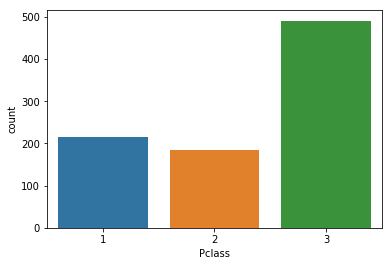

In [41]:
sns.countplot(data=df,x='Pclass')

##### Class with Survived

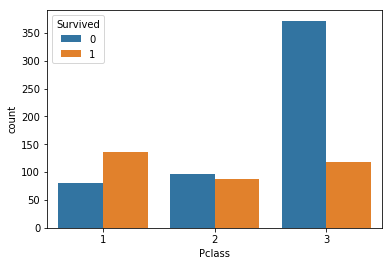

In [42]:
sns.countplot(data=df,x='Pclass',hue='Survived')

## Fare 

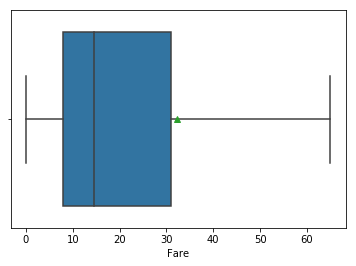

In [43]:
sns.boxplot(data=df,x='Fare',showfliers=False,showmeans=True)

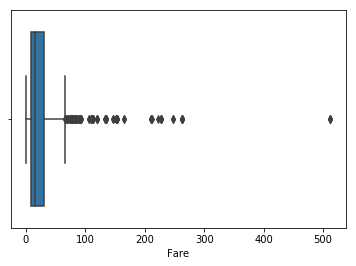

In [44]:
sns.boxplot(data=df,x='Fare',showfliers=True)

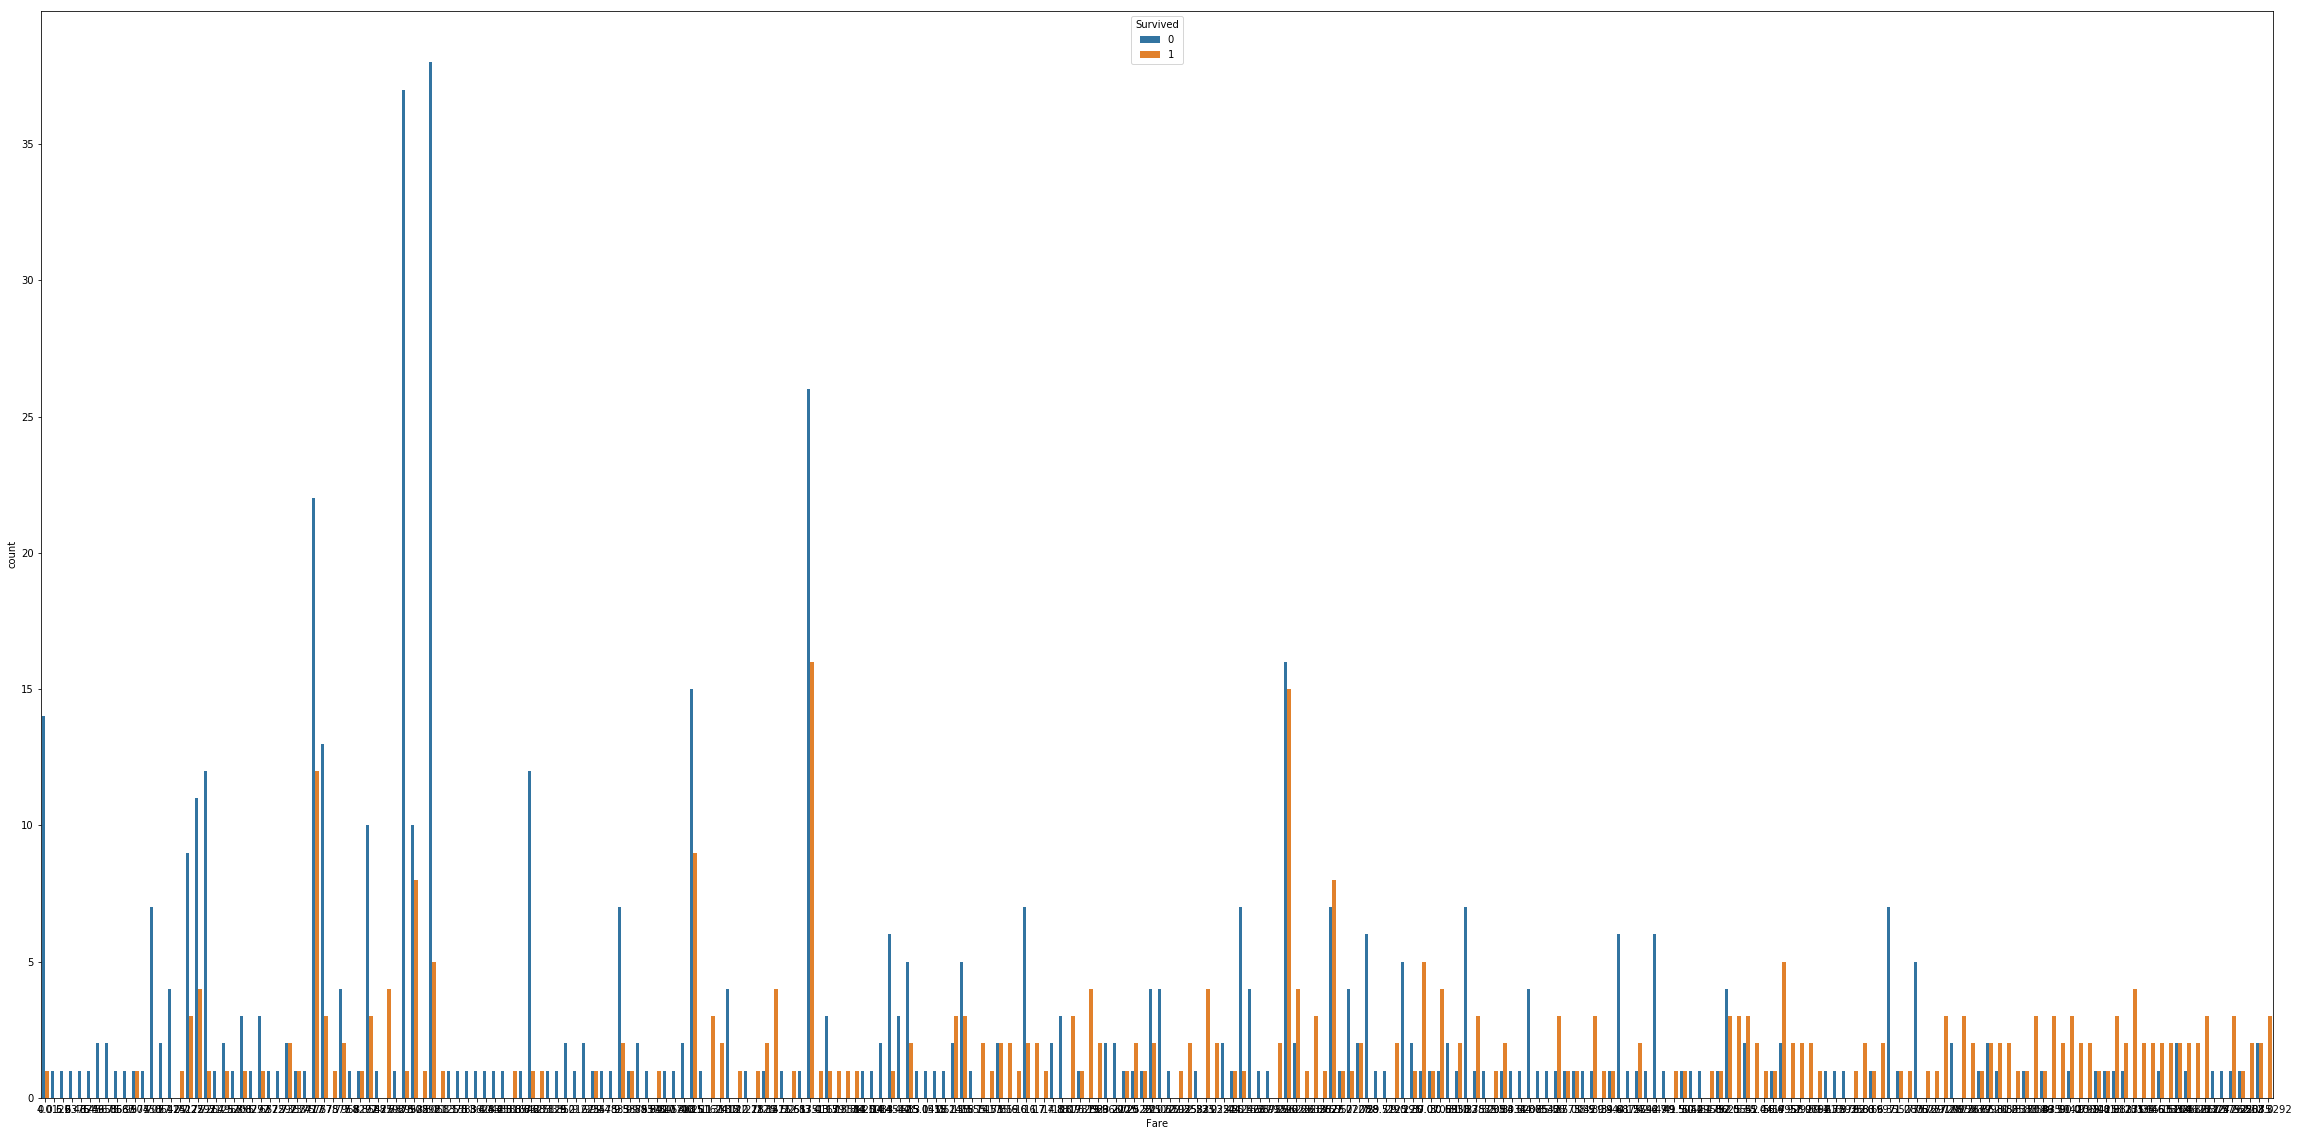

In [45]:
f, ax = plt.subplots(figsize=(40, 20))
sns.countplot(data=df,x='Fare',hue='Survived')

##### Binning

In [46]:
# QCUT
df['Fare_Bins']=pd.qcut(df["Fare"],3,labels=['Low','Average','High'])

In [47]:
df['Fare_Bins'].value_counts()

Low        308
High       295
Average    288
Name: Fare_Bins, dtype: int64

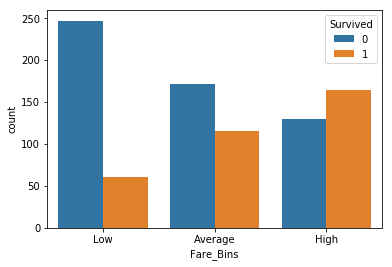

In [48]:
sns.countplot(data = df, x= 'Fare_Bins',hue='Survived')

## Fare Vs Pclass

C:\Users\koush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


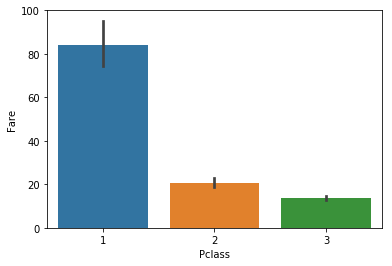

In [49]:
sns.barplot(data=df,x='Pclass',y='Fare')



## Cabin

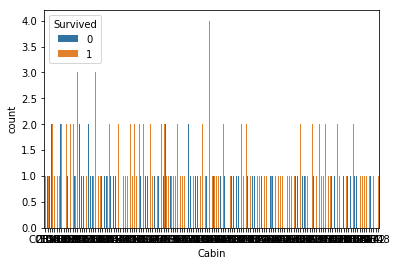

In [50]:
sns.countplot(data=df,x='Cabin',hue='Survived')

In [51]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

## Co-relation Matrix

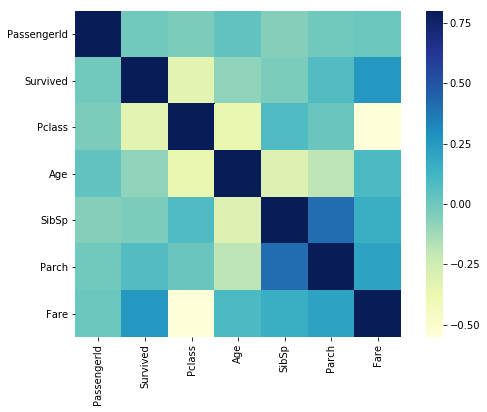

In [52]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu")

In [53]:
df.drop('Age_Bins',inplace=True,axis=1)

In [54]:
df.drop('Age_Bins1',axis=1,inplace=True)

In [55]:
df.drop('Fare_Bins',axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing Value and Outlier Treatment

##### Age

In [57]:
df["Age"].median()

28.0

In [58]:
df["Age"].fillna(df['Age'].median(),inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Embark

In [60]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)

In [61]:
df['Embarked'].isna().any()

False

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Cabin

In [63]:
df['Cabin'].count()

204

In [64]:
train=df.drop("Cabin",axis=1)

In [65]:
train.drop('Name',axis=1,inplace=True)

In [66]:
train.drop('Ticket',axis=1,inplace=True)

In [67]:
train.drop('PassengerId',axis=1,inplace=True)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [69]:
train.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
52,1,1,female,49.0,1,0,76.7292,C
751,1,3,male,6.0,0,1,12.4750,S
573,1,3,female,28.0,0,0,7.7500,Q


In [70]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Writting to File

In [71]:
train.to_csv("Titanic_Final.csv",index = False)

## Final Filtering

In [72]:
y = train['Survived']
X = train.drop('Survived',axis=1)

In [73]:
X1 = X.copy()

In [74]:
X  = pd.get_dummies(X)

In [75]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

# Building Model

### Logistic Regression

In [76]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Spliting data into train and test data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
# Display score
print( model.score(X_test, y_test))

0.7988826815642458


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
print(model.score(X_test,y_test))

0.770949720670391


### Using Grid Search

In [83]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [84]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)
model.fit(X_train,y_train)
pprint('Paramenters in use:')
pprint(model.get_params())

'Paramenters in use:'
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
print(model.score(X_test,y_test))

0.8379888268156425


In [110]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

In [111]:
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [112]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [130]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [131]:
print(CV_rfc.score(X_test,y_test))

0.8547486033519553


## Binnning Age

In [82]:
train = pd.read_csv('Titanic_Final.csv')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [84]:
# Using CUT and QCUT
bins = [0,20,40,60,80]
group=['young','adults','middleage','oldage']
group1=['Young','Adult','Old']
train['Age_Bins']=pd.cut(x=train['Age'],bins=bins,labels=group)
train['Age_Binsq']=pd.qcut(train["Age"],3,labels=group1)

In [85]:
#train1=train.drop('Age_Binsq', axis=1)
train1 = train.drop('Age_Bins',axis=1)

In [86]:
y = train1['Survived']
X_1 = train1.drop('Survived', axis = 1)

In [87]:
X_1  = pd.get_dummies(X_1)

In [88]:
X_1.shape, y.shape

((891, 13), (891,))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y,test_size=0.2,random_state=0)

In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7988826815642458

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7877094972067039

## Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
dit = {}

#### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['LR'] = score.mean()

0.792402475789838


C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#### Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
model = DecisionTreeClassifier()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['DT'] = score.mean()

0.7699806403817027


#### Navie Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
model = GaussianNB()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['NB'] = score.mean()

0.7901613490664365


#### K-Nearest Neighbors

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
model = KNeighborsClassifier()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['KN'] = score.mean()

0.7071461071350426


#### Support Vector Classifier

In [102]:
from sklearn.svm import SVC

In [103]:
model = SVC()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['SVC'] = score.mean()

0.7161982092973689


C:\Users\koush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

#### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model = RandomForestClassifier()
score = cross_val_score(model,X_1,y,cv=5)
print(score.mean())
dit['RF'] = score.mean()

0.8125960223236719


C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\koush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

## Graph for different Classifiers

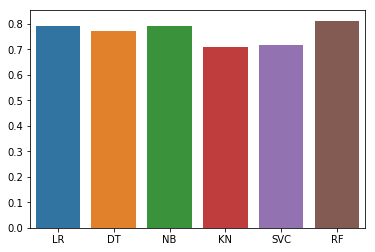

In [106]:
sns.barplot(x = list(dit.keys()), y = list(dit.values()))